In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')

In [3]:
df

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
df.columns =['months_as_customer','age','policy_number','policy_bind_date','policy_state','policy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported','_c39']
x = df.drop("months_as_customer", axis=1)  


In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [6]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
998,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [7]:
df.shape

(999, 39)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    object 
 4   policy_state                 999 non-null    object 
 5   policy_csl                   999 non-null    object 
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_education_level      999 non-null    object 
 11  insured_occupation           999 non-null    object 
 12  insured_hobbies              999 non-null    object 
 13  insured_relationship

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-loss,incident_date,number_of_vehicles_involved,property_damage,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.829830,38.938939,546263.326326,1136.136136,1256.255495,1.102102e+06,501249.605606,25097.897898,-26820.520521,11.650651,1.839840,0.991992,1.486486,52743.073073,7434.344344,7393.943944,37914.784785,2005.104104
std,115.103809,9.140370,257190.576942,612.155989,244.243187,2.298293e+06,71728.919924,27871.869471,28105.366259,6.951671,1.019044,0.820538,1.111773,26408.011569,4883.309038,4823.859773,18890.397013,6.018773
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,335913.500000,500.000000,1089.185000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,38.000000,533940.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [10]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted           0
incident_state                 91
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_

In [11]:
df.drop('_c39',axis=1,inplace=True)

In [12]:
df.shape

(999, 38)

In [13]:
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('==========================================================')


policy_bind_date
05-08-1992    3
01-01-2006    3
28-04-1992    3
09-08-2004    2
09-03-2003    2
             ..
12-12-1998    1
18-02-1999    1
30-10-1997    1
29-11-1999    1
11-11-1996    1
Name: count, Length: 950, dtype: int64
policy_state
OH    351
IL    338
IN    310
Name: count, dtype: int64
policy_csl
250/500     350
100/300     349
500/1000    300
Name: count, dtype: int64
insured_education_level
FEMALE    537
MALE      462
Name: count, dtype: int64
insured_occupation
JD             161
High School    160
Associate      145
MD             143
Masters        143
PhD            125
College        122
Name: count, dtype: int64
insured_hobbies
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         73
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: 

In [14]:
# replacing '?' with No info
df=df.replace('?','No Info')

some of the rows are having ? sign replacing them with No info



In [15]:
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('==========================================================')


policy_bind_date
05-08-1992    3
01-01-2006    3
28-04-1992    3
09-08-2004    2
09-03-2003    2
             ..
12-12-1998    1
18-02-1999    1
30-10-1997    1
29-11-1999    1
11-11-1996    1
Name: count, Length: 950, dtype: int64
policy_state
OH    351
IL    338
IN    310
Name: count, dtype: int64
policy_csl
250/500     350
100/300     349
500/1000    300
Name: count, dtype: int64
insured_education_level
FEMALE    537
MALE      462
Name: count, dtype: int64
insured_occupation
JD             161
High School    160
Associate      145
MD             143
Masters        143
PhD            125
College        122
Name: count, dtype: int64
insured_hobbies
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         73
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: 

In [16]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-loss,incident_date,number_of_vehicles_involved,property_damage,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.829830,38.938939,546263.326326,1136.136136,1256.255495,1.102102e+06,501249.605606,25097.897898,-26820.520521,11.650651,1.839840,0.991992,1.486486,52743.073073,7434.344344,7393.943944,37914.784785,2005.104104
std,115.103809,9.140370,257190.576942,612.155989,244.243187,2.298293e+06,71728.919924,27871.869471,28105.366259,6.951671,1.019044,0.820538,1.111773,26408.011569,4883.309038,4823.859773,18890.397013,6.018773
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,335913.500000,500.000000,1089.185000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,38.000000,533940.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [17]:
df['umbrella_limit'].value_counts()

umbrella_limit
 0           797
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: count, dtype: int64

In [18]:
df.loc[df['umbrella_limit']==-1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
289,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,...,0,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996


In [19]:
# droping this value row(one row only)
df.drop(df[df['umbrella_limit']==-1000000].index,inplace=True)

In [20]:
# dividing policy_bind_date into three other columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

# dropping policy_bind_date  column
df.drop('policy_bind_date',axis=1,inplace=True)

In [21]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,27,06,2006
1,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,06,09,2000
2,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,25,05,1990
3,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,06,06,2014
4,256,39,104594,OH,250/500,1000,1351.10,0,478456,FEMALE,...,64100,6410,6410,51280,Saab,95,2003,12,10,2006


In [22]:
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [23]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,insured_occupation,insured_hobbies,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,5070,780,780,3510,Mercedes,E400,2007,27,06,2006
1,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,34650,7700,3850,23100,Dodge,RAM,2007,06,09,2000
2,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,25,05,1990
3,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,6500,1300,650,4550,Accura,RSX,2009,06,06,2014
4,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,64100,6410,6410,51280,Saab,95,2003,12,10,2006


In [24]:
df['fraud_reported'].value_counts()

fraud_reported
1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2002    49
2013    49
2015    47
2012    46
1997    46
2008    45
2014    44
2000    42
2001    42
1998    40
2004    38
1996    36
Name: count, dtype: int64

# EDA

In [25]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,insured_occupation,insured_hobbies,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,5070,780,780,3510,Mercedes,E400,2007,27,06,2006
1,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,34650,7700,3850,23100,Dodge,RAM,2007,06,09,2000
2,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,25,05,1990
3,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,6500,1300,650,4550,Accura,RSX,2009,06,06,2014
4,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,64100,6410,6410,51280,Saab,95,2003,12,10,2006


<Axes: xlabel='fraud_reported', ylabel='total_claim_amount'>

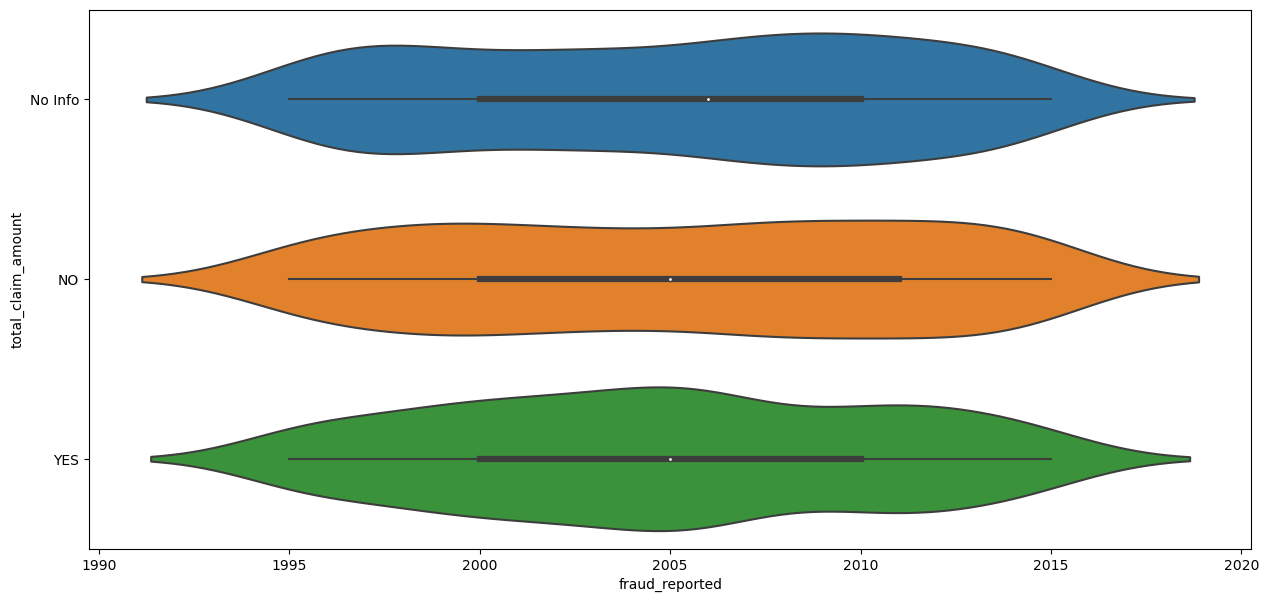

In [26]:
plt.figure(figsize=(15,7))
sns.violinplot(y='total_claim_amount',x='fraud_reported',data=df)


<Axes: xlabel='number_of_vehicles_involved', ylabel='count'>

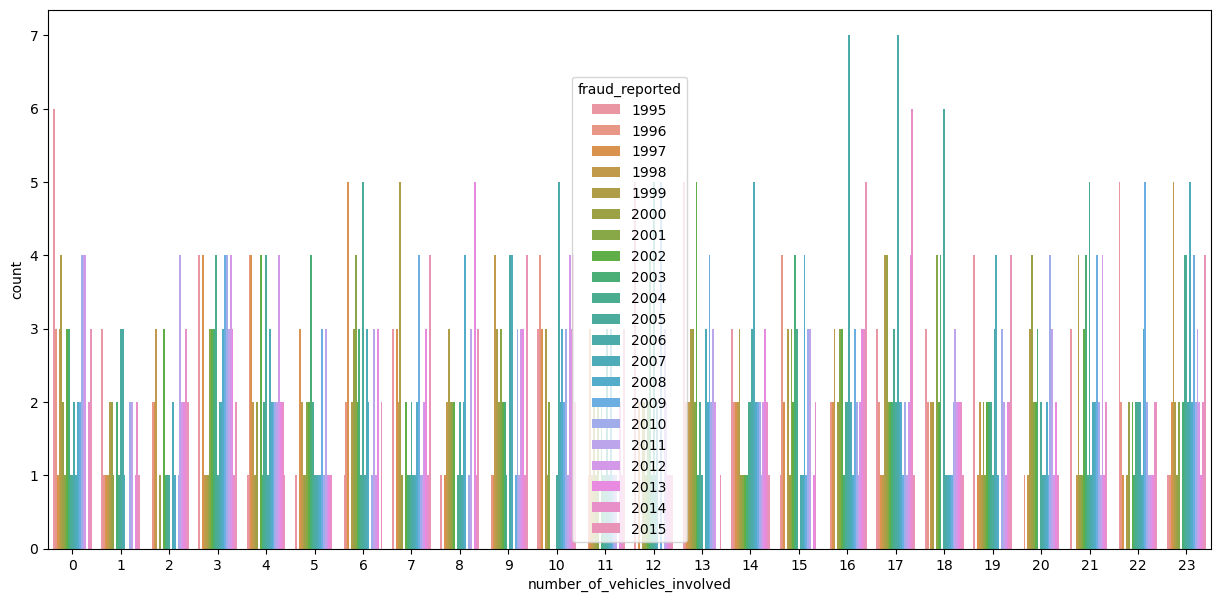

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)


<Axes: xlabel='incident_city', ylabel='count'>

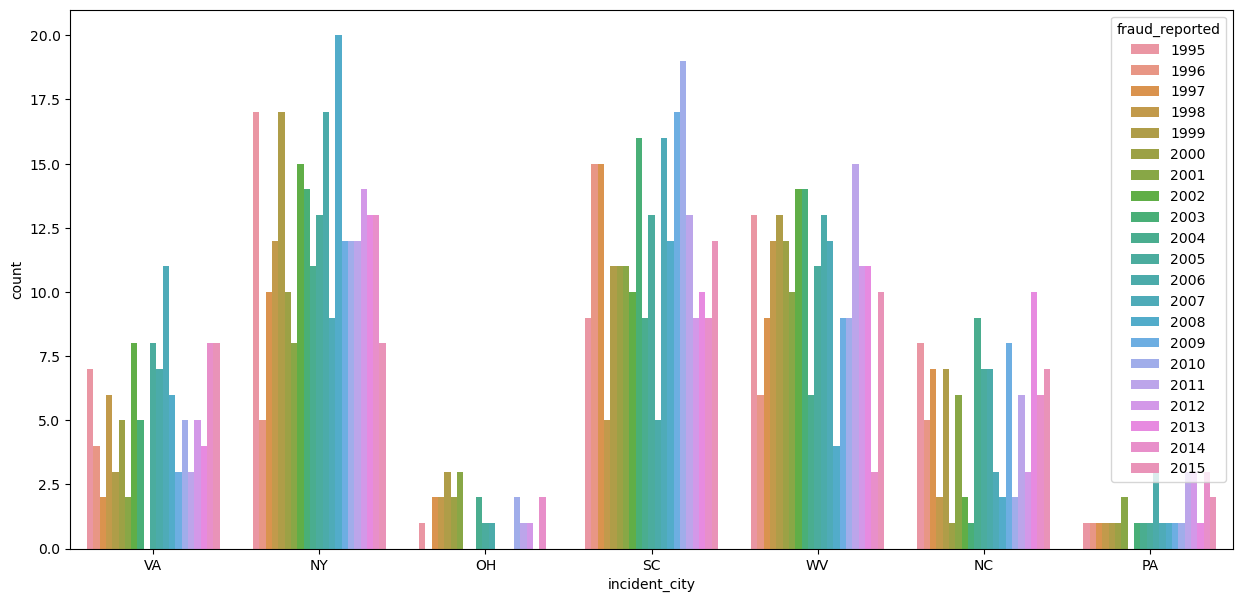

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)


<Axes: xlabel='incident_state', ylabel='count'>

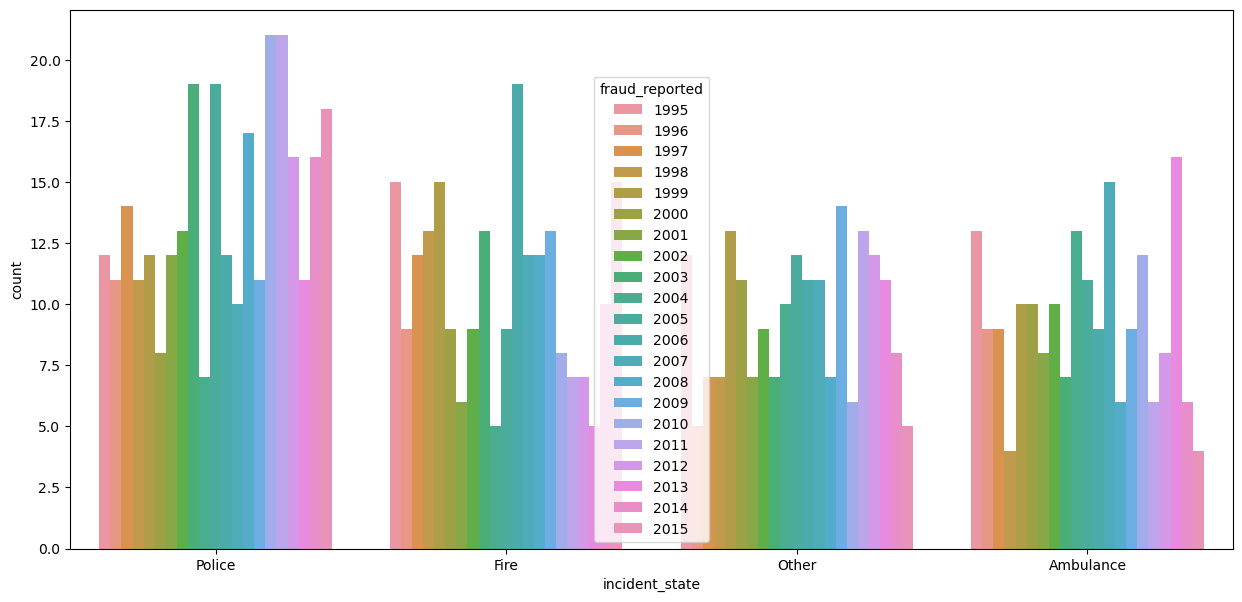

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)


<Axes: xlabel='authorities_contacted', ylabel='count'>

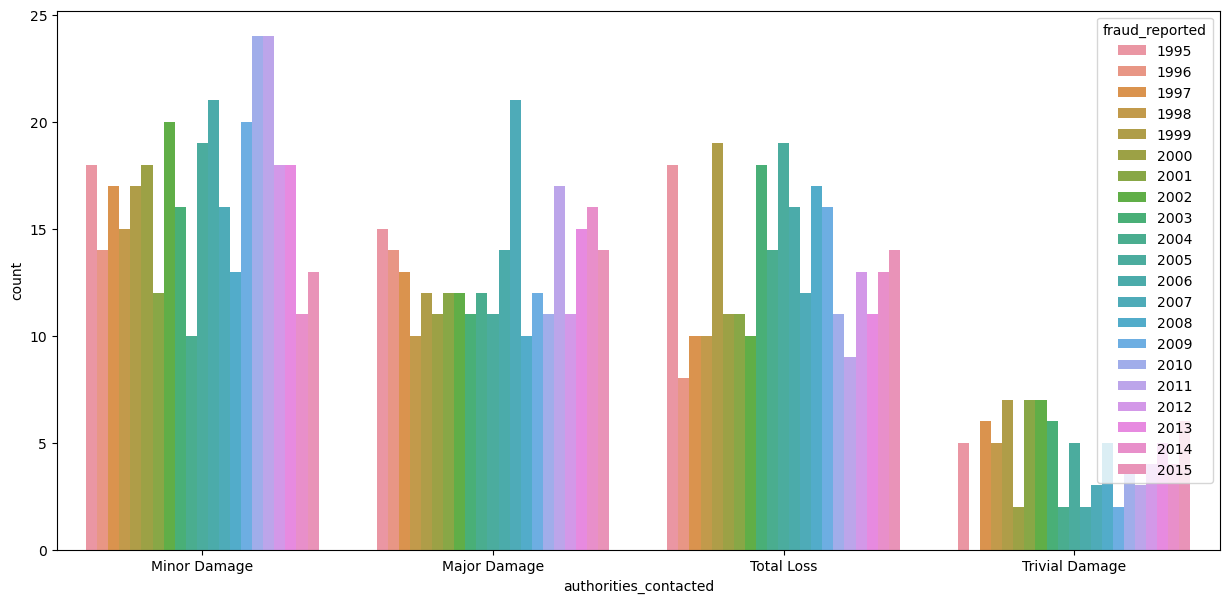

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)


<Axes: xlabel='incident_severity', ylabel='count'>

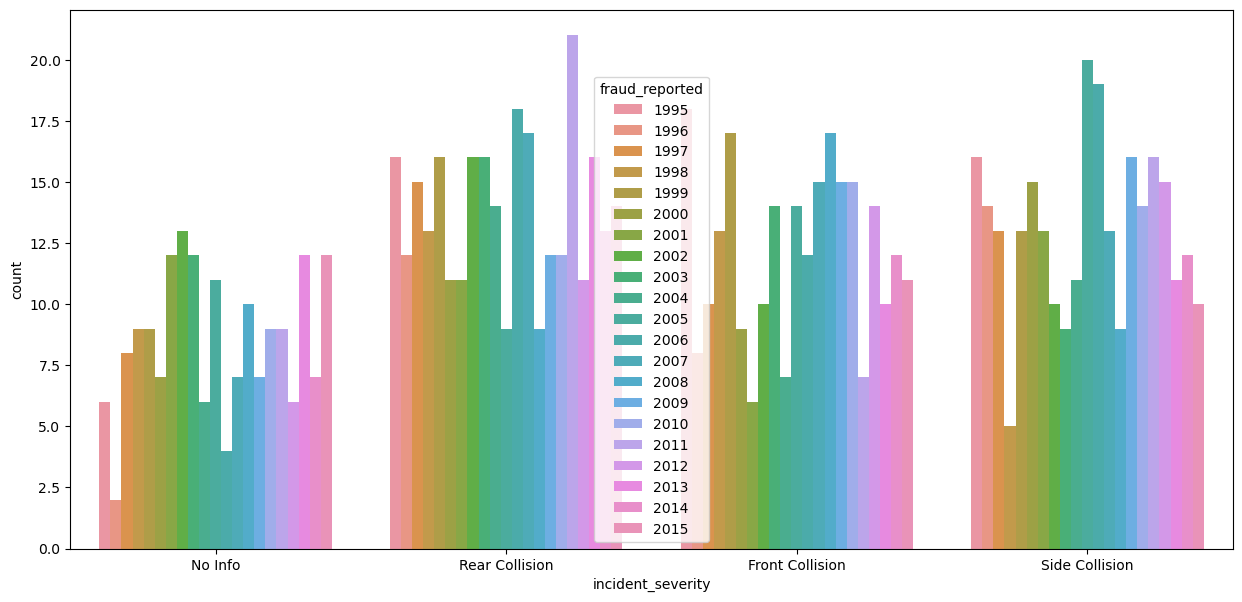

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)


<Axes: xlabel='collision_type', ylabel='count'>

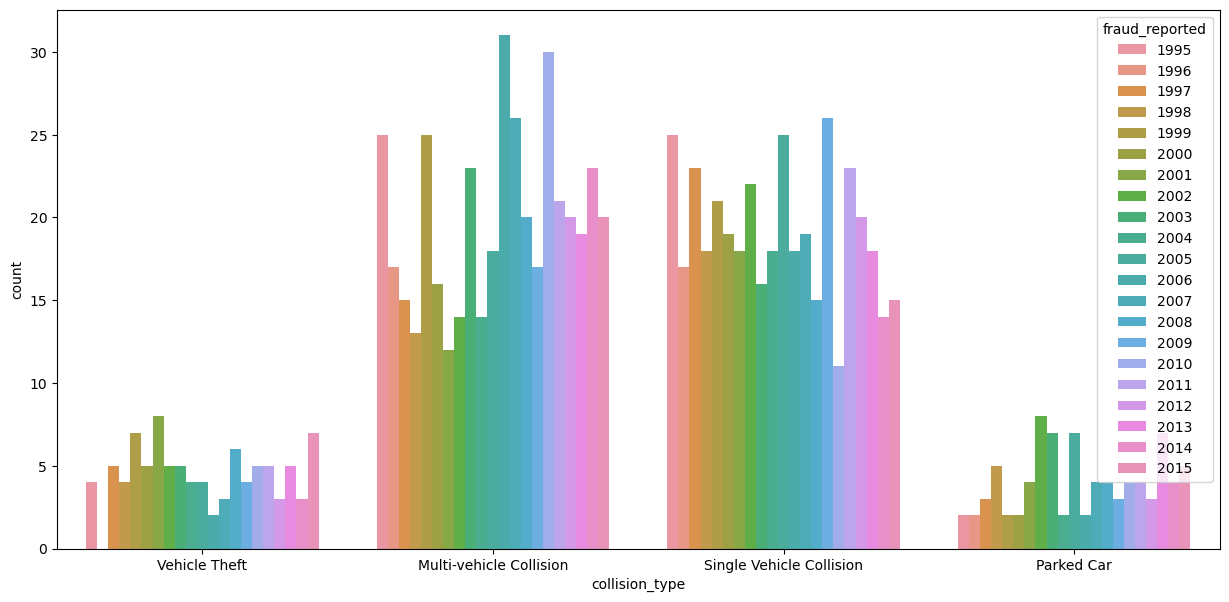

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)


<Axes: xlabel='incident_type', ylabel='count'>

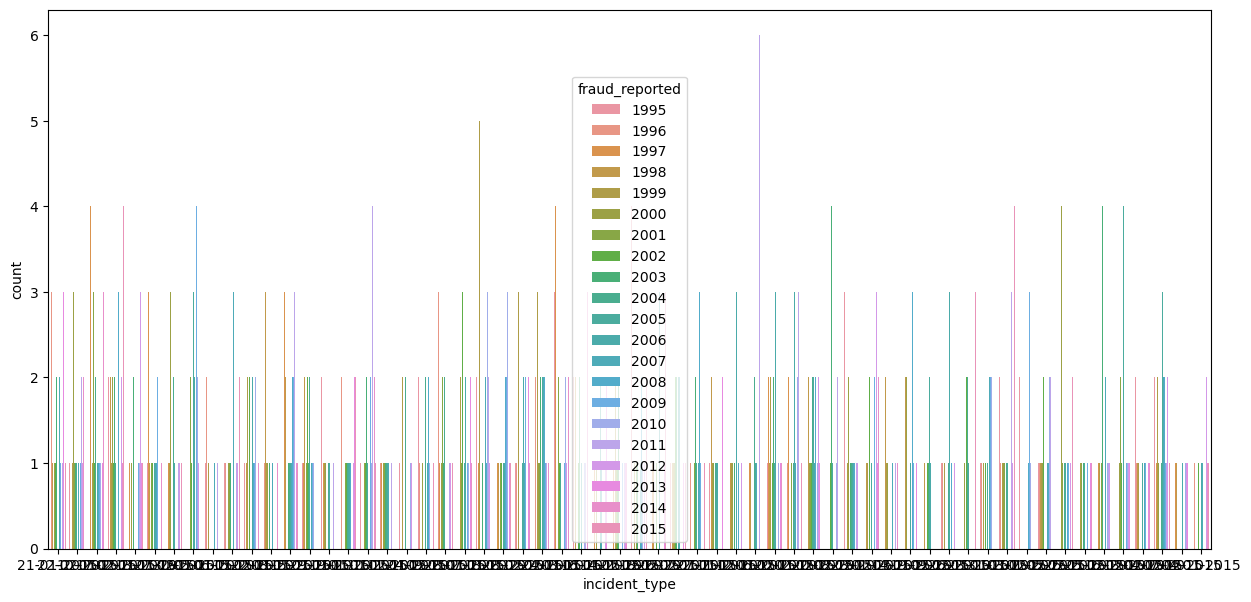

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)


<Axes: xlabel='fraud_reported', ylabel='capital-loss'>

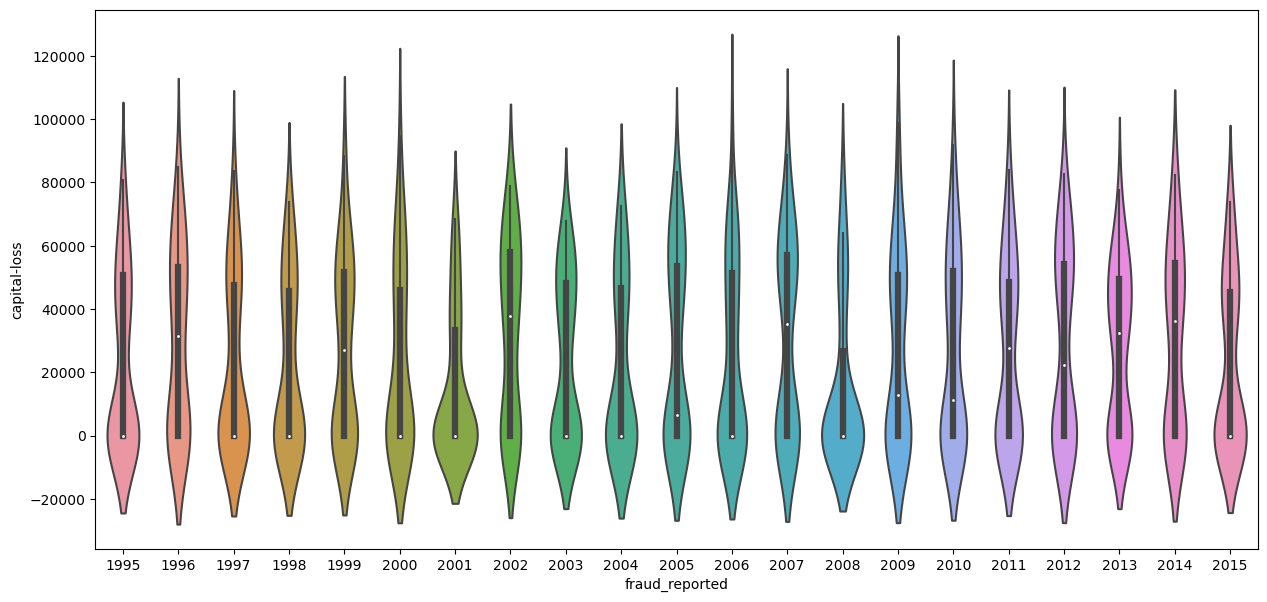

In [34]:
plt.figure(figsize=(15,7))
sns.violinplot(y='capital-loss',x='fraud_reported',data=df)


<Axes: xlabel='fraud_reported', ylabel='capital-gains'>

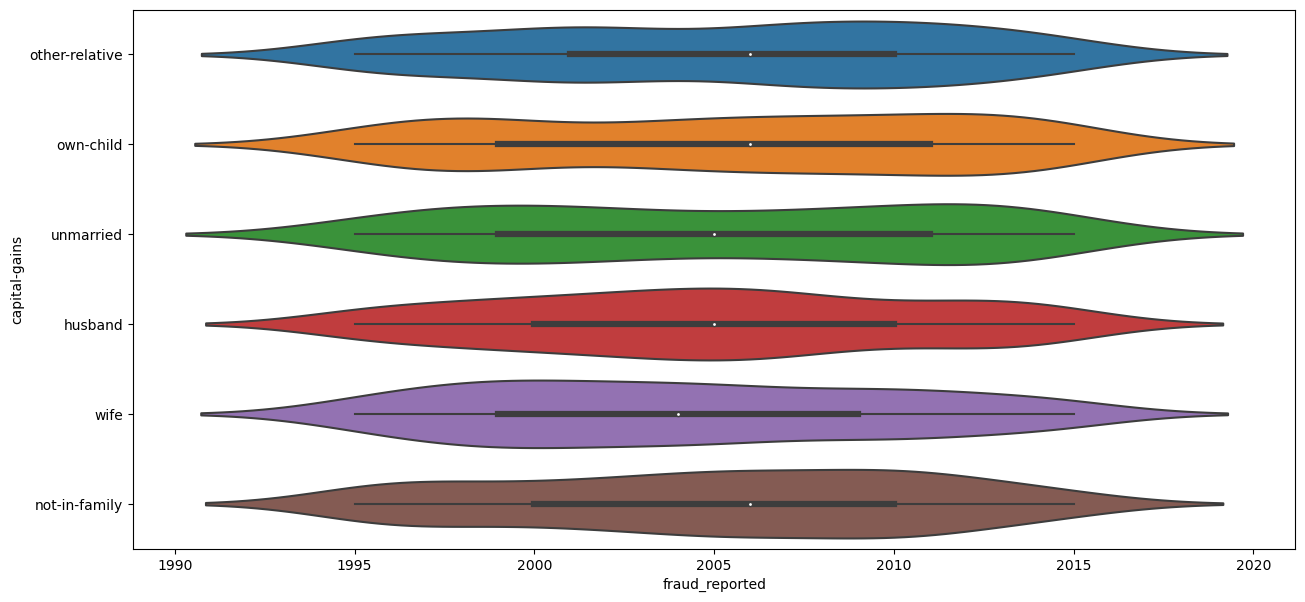

In [35]:
plt.figure(figsize=(15,7))
sns.violinplot(y='capital-gains',x='fraud_reported',data=df)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'reading'),
  Text(1, 0, 'board-games'),
  Text(2, 0, 'bungie-jumping'),
  Text(3, 0, 'base-jumping'),
  Text(4, 0, 'golf'),
  Text(5, 0, 'camping'),
  Text(6, 0, 'dancing'),
  Text(7, 0, 'skydiving'),
  Text(8, 0, 'movies'),
  Text(9, 0, 'hiking'),
  Text(10, 0, 'yachting'),
  Text(11, 0, 'paintball'),
  Text(12, 0, 'chess'),
  Text(13, 0, 'kayaking'),
  Text(14, 0, 'polo'),
  Text(15, 0, 'basketball'),
  Text(16, 0, 'video-games'),
  Text(17, 0, 'sleeping'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

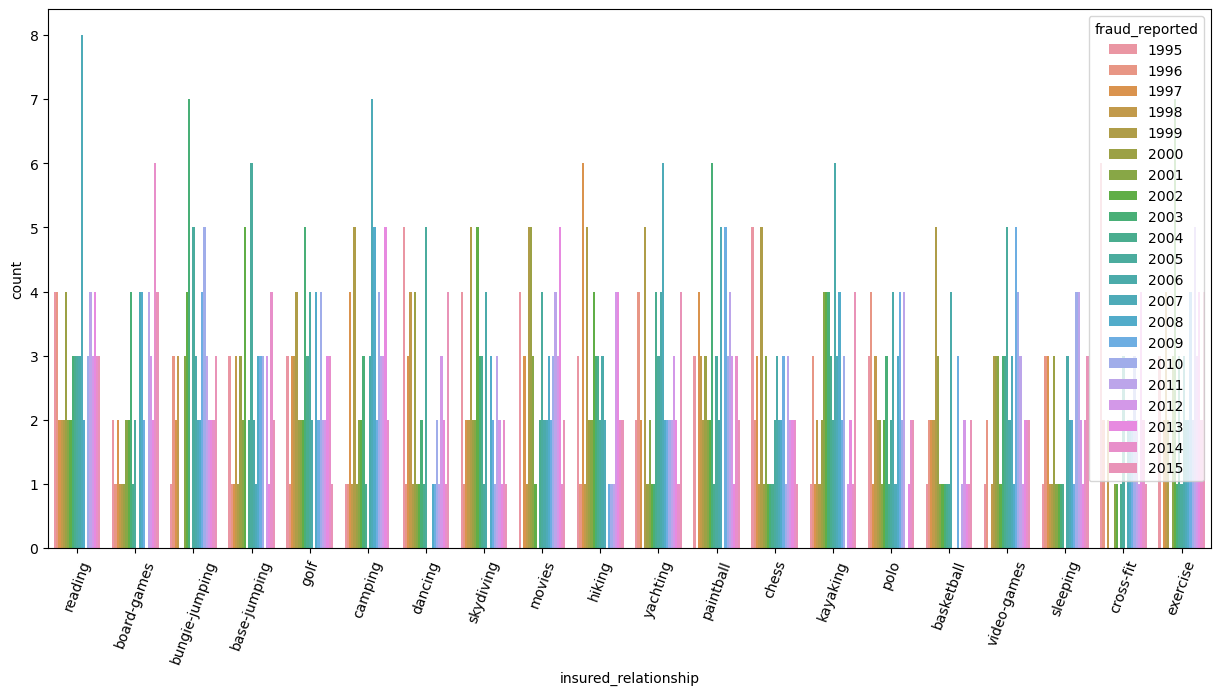

In [36]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'machine-op-inspct'),
  Text(1, 0, 'sales'),
  Text(2, 0, 'armed-forces'),
  Text(3, 0, 'tech-support'),
  Text(4, 0, 'prof-specialty'),
  Text(5, 0, 'other-service'),
  Text(6, 0, 'priv-house-serv'),
  Text(7, 0, 'exec-managerial'),
  Text(8, 0, 'protective-serv'),
  Text(9, 0, 'transport-moving'),
  Text(10, 0, 'craft-repair'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

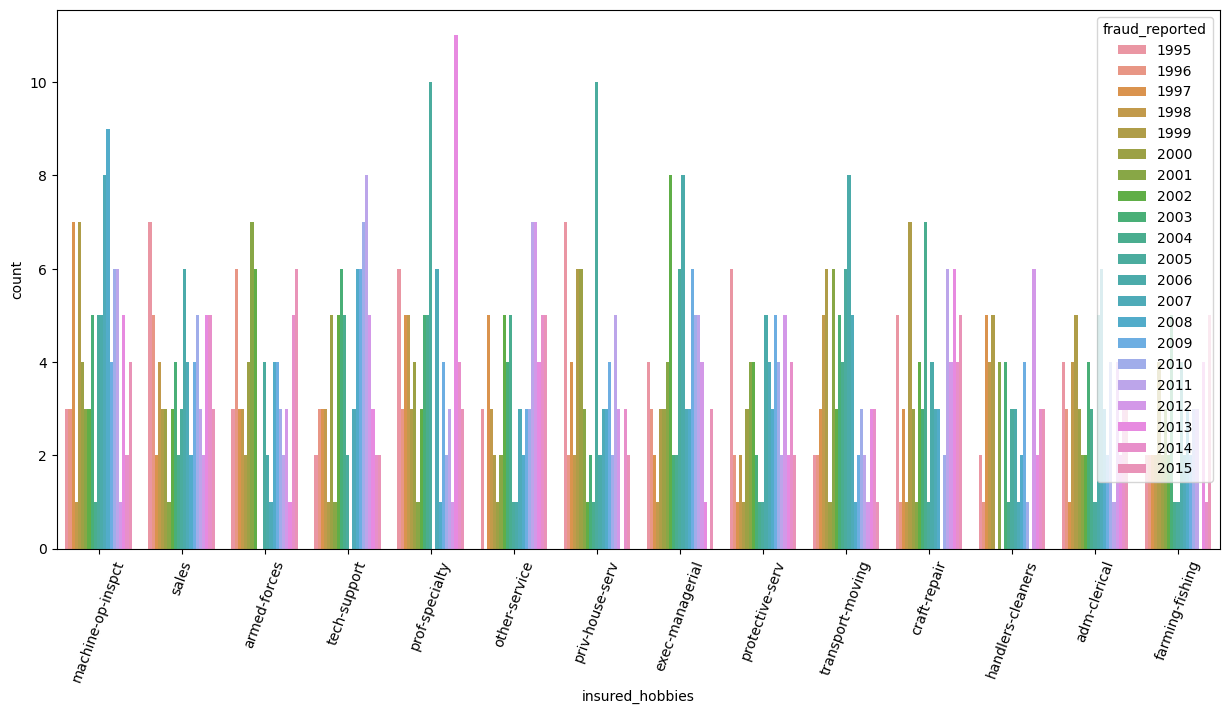

In [37]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

<Axes: xlabel='fraud_reported', ylabel='vehicle_claim'>

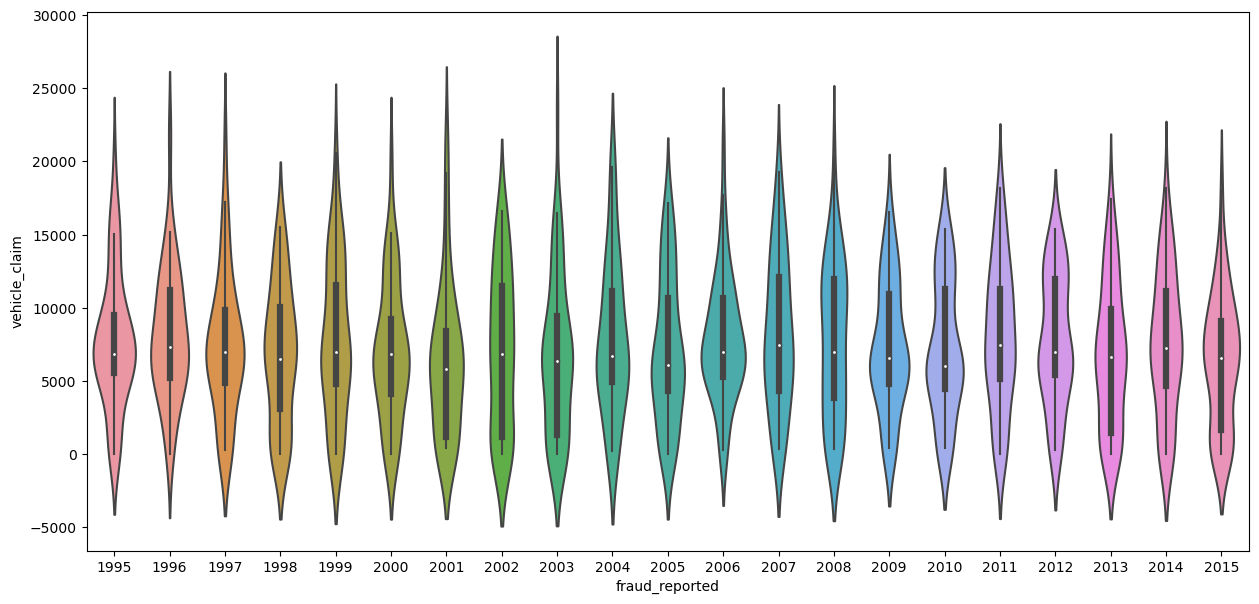

In [38]:
plt.figure(figsize=(15,7))
sns.violinplot(y='vehicle_claim',x='fraud_reported',data=df)

<Axes: xlabel='fraud_reported', ylabel='property_claim'>

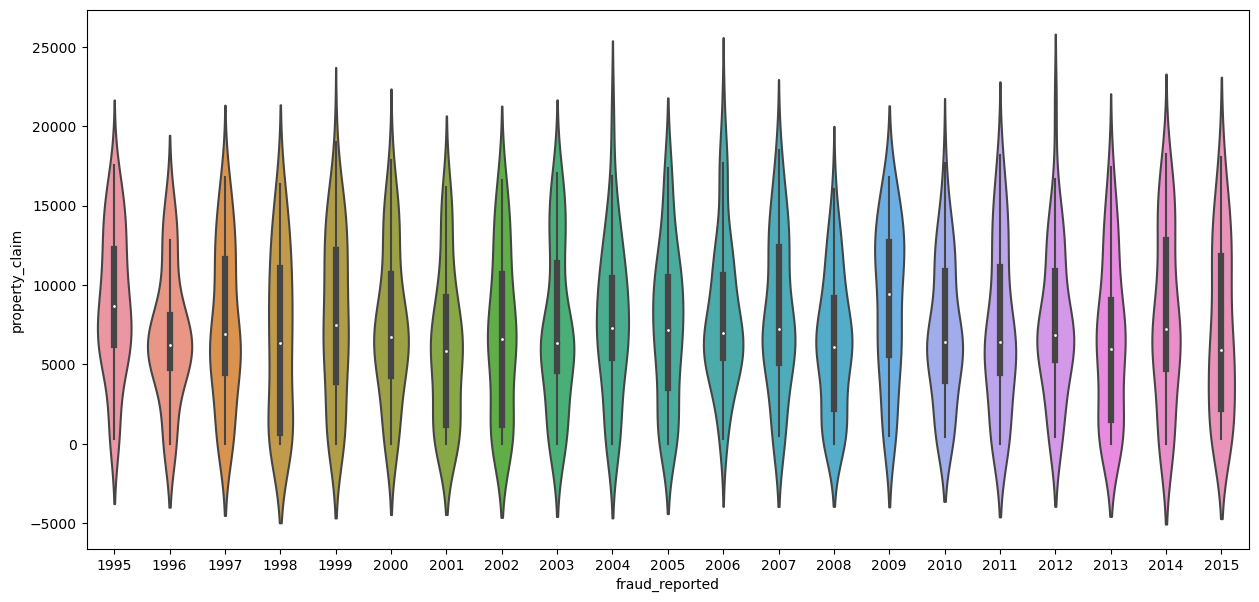

In [39]:
plt.figure(figsize=(15,7))
sns.violinplot(y='property_claim',x='fraud_reported',data=df)

<Axes: xlabel='fraud_reported', ylabel='injury_claim'>

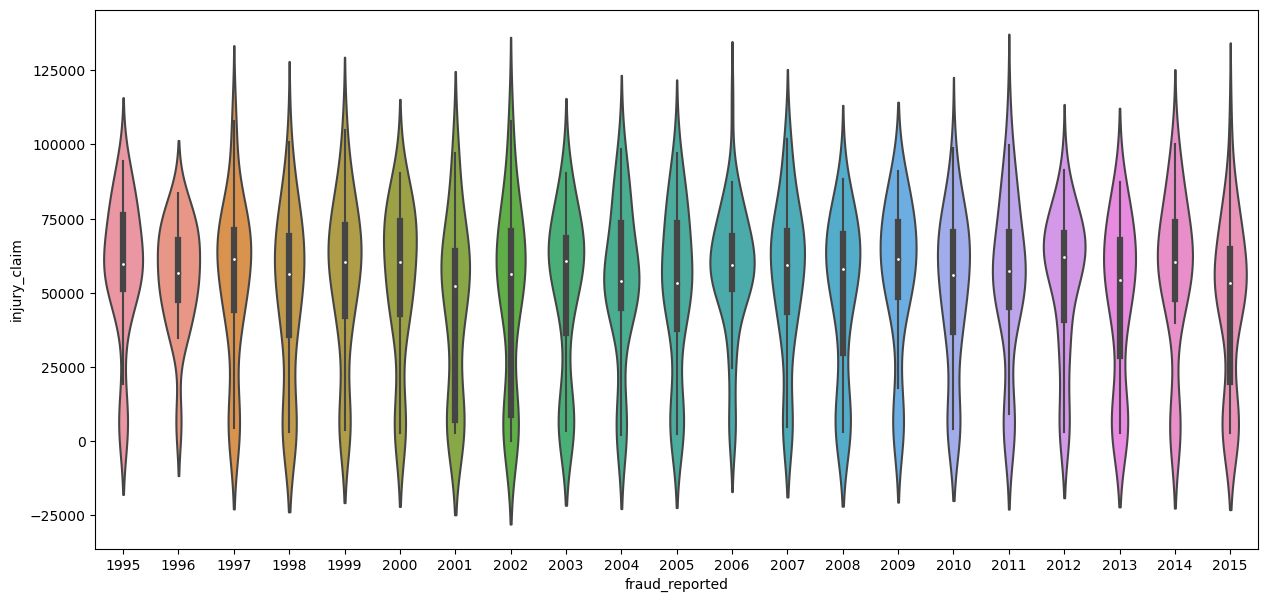

In [40]:
plt.figure(figsize=(15,7))
sns.violinplot(y='injury_claim',x='fraud_reported',data=df)

<Axes: xlabel='fraud_reported', ylabel='vehicle_claim'>

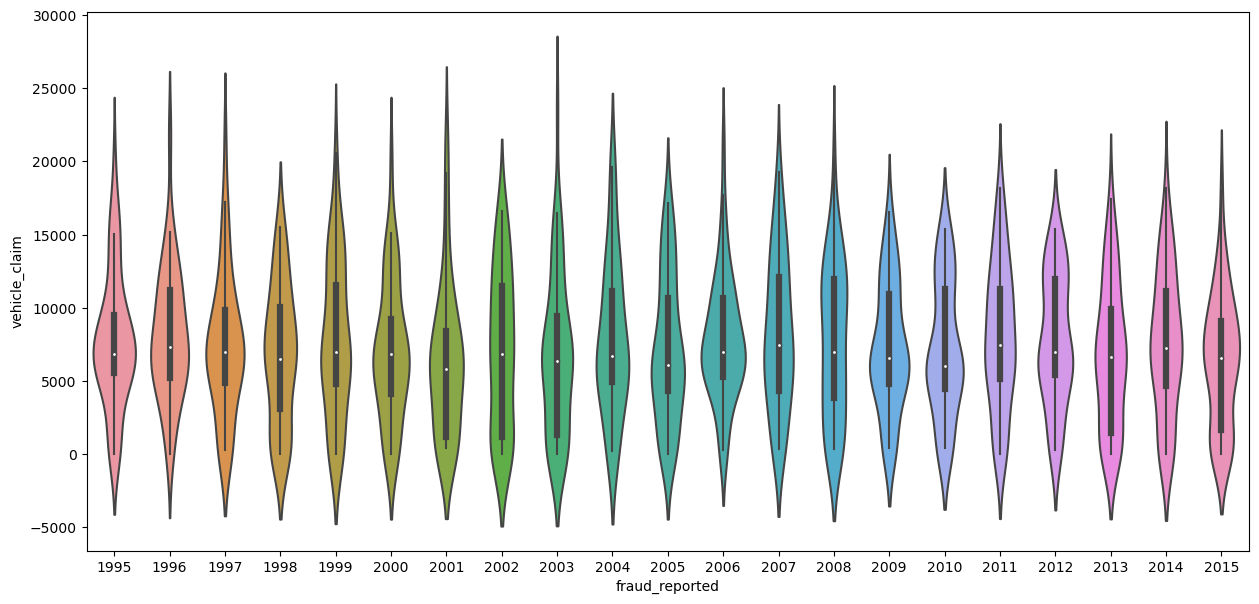

In [41]:
plt.figure(figsize=(15,7))
sns.violinplot(y='vehicle_claim',x='fraud_reported',data=df)

<Axes: xlabel='fraud_reported', ylabel='umbrella_limit'>

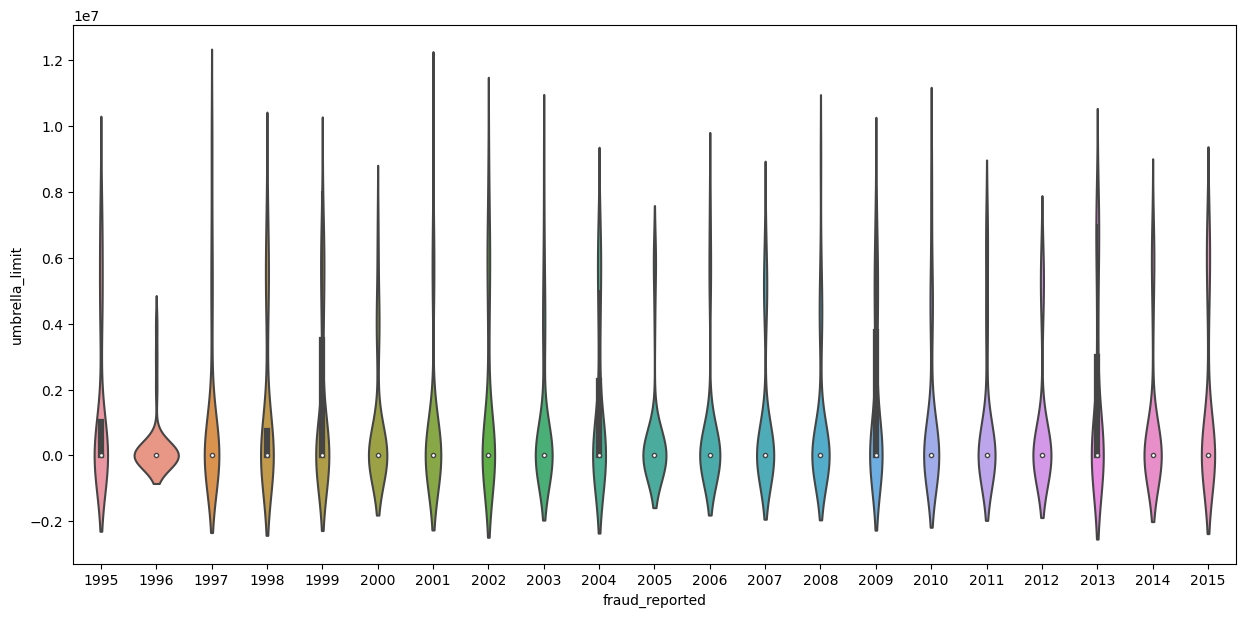

In [42]:
plt.figure(figsize=(15,7))
sns.violinplot(x='fraud_reported',y='umbrella_limit',data=df)

<Axes: xlabel='fraud_reported', ylabel='policy_annual_premium'>

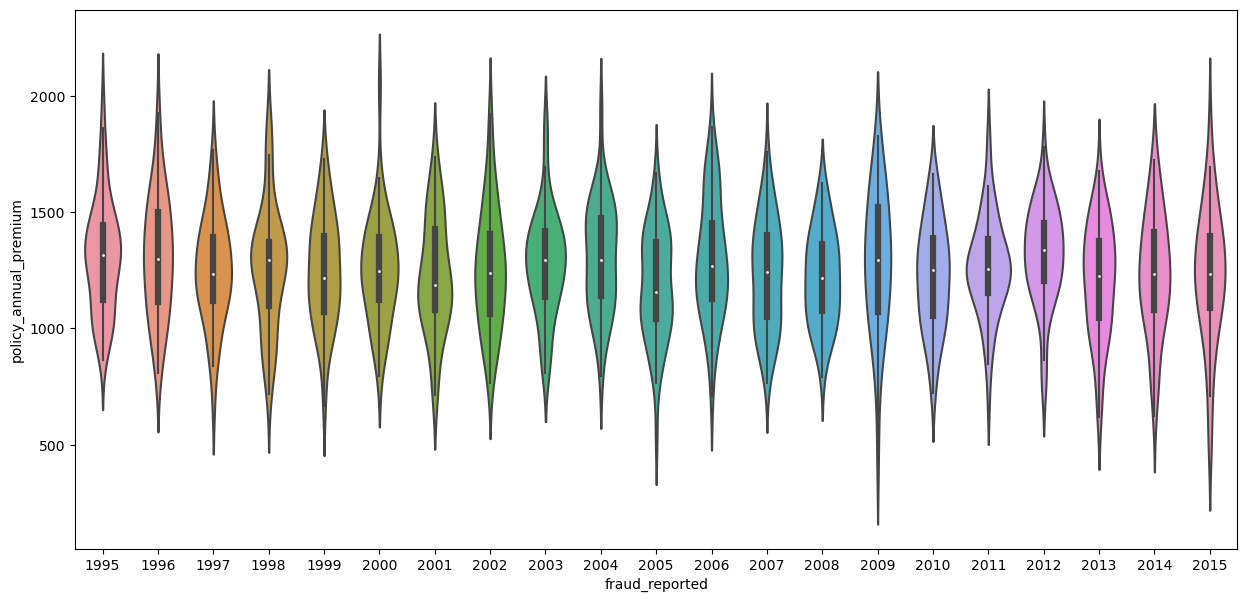

In [43]:
plt.figure(figsize=(15,7))
sns.violinplot(x='fraud_reported',y='policy_annual_premium',data=df)

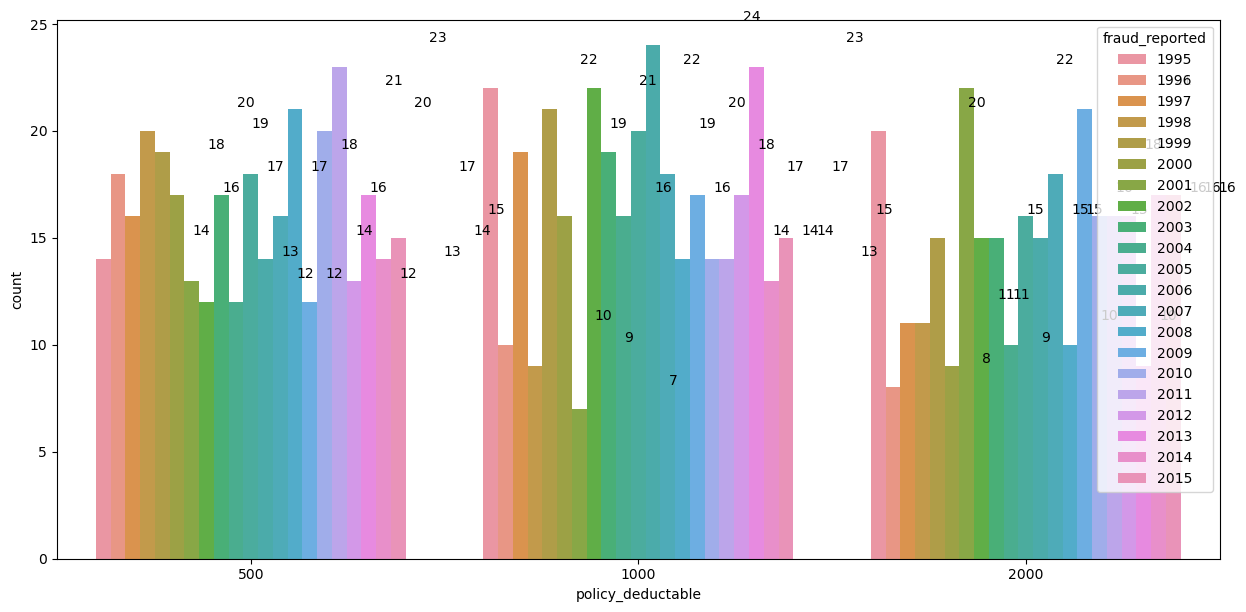

In [44]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x='policy_deductable',hue='fraud_reported',data=df)
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va='bottom',color='black')

<Axes: xlabel='policy_csl', ylabel='count'>

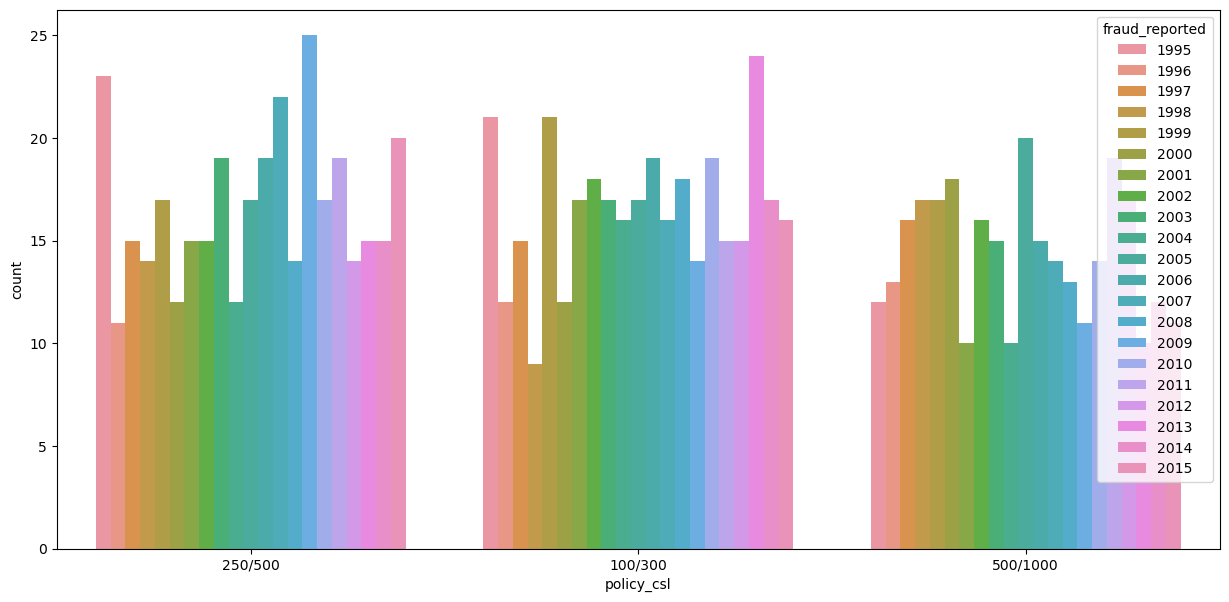

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_csl',hue='fraud_reported',data=df)

<Axes: xlabel='policy_state', ylabel='count'>

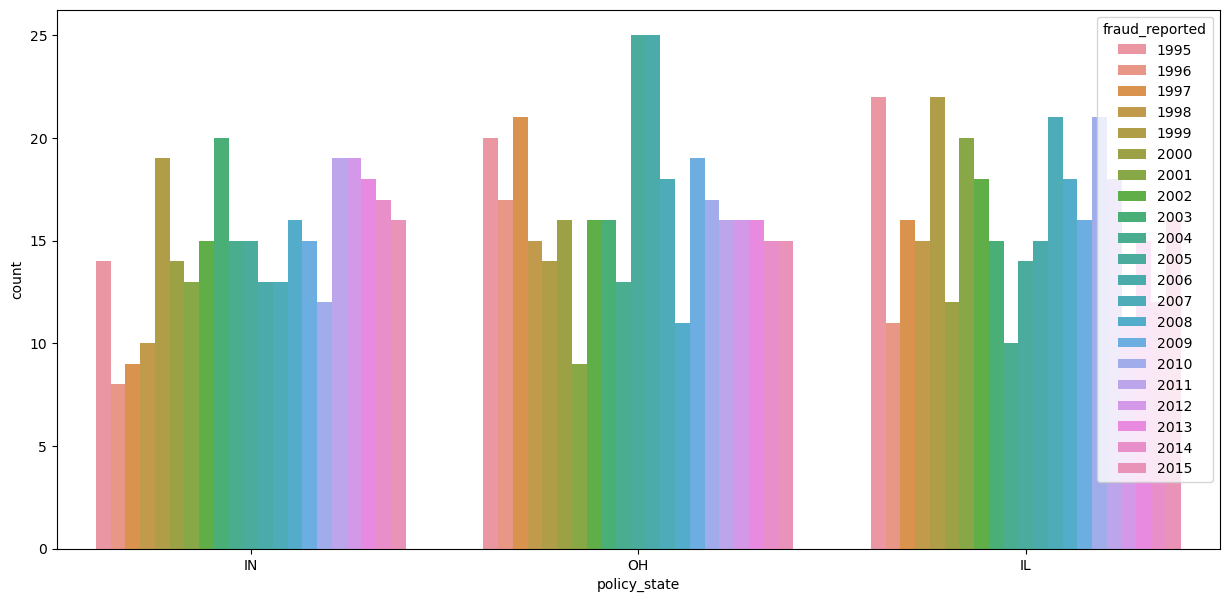

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_state',hue='fraud_reported',data=df)

<Axes: xlabel='age', ylabel='count'>

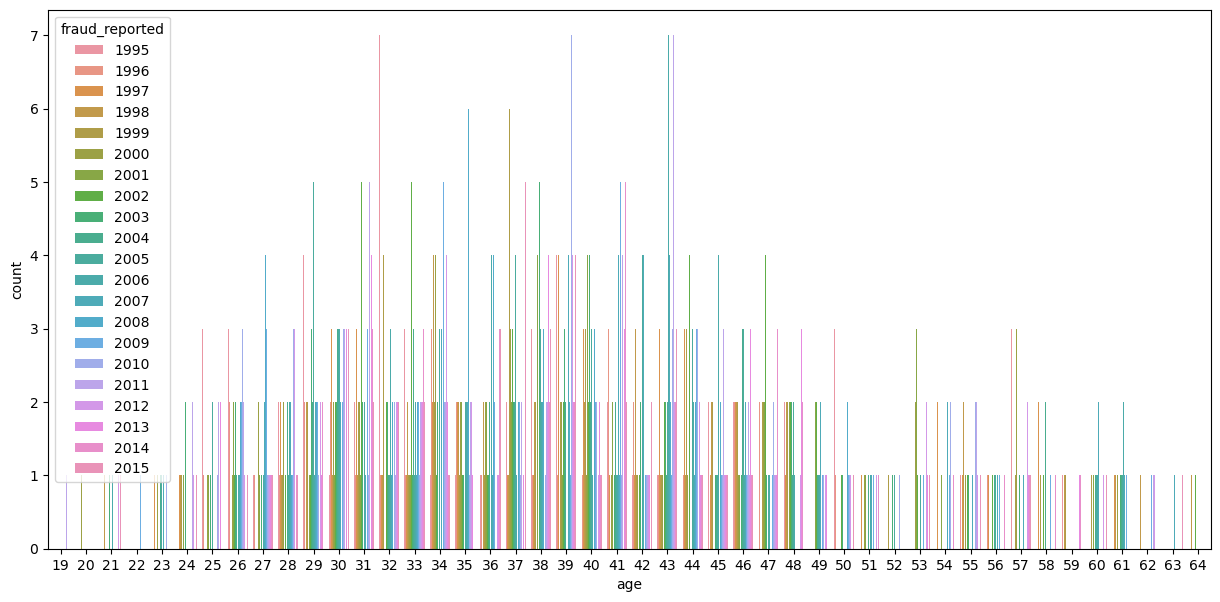

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(x='age',hue='fraud_reported',data=df)

<Axes: xlabel='fraud_reported', ylabel='months_as_customer'>

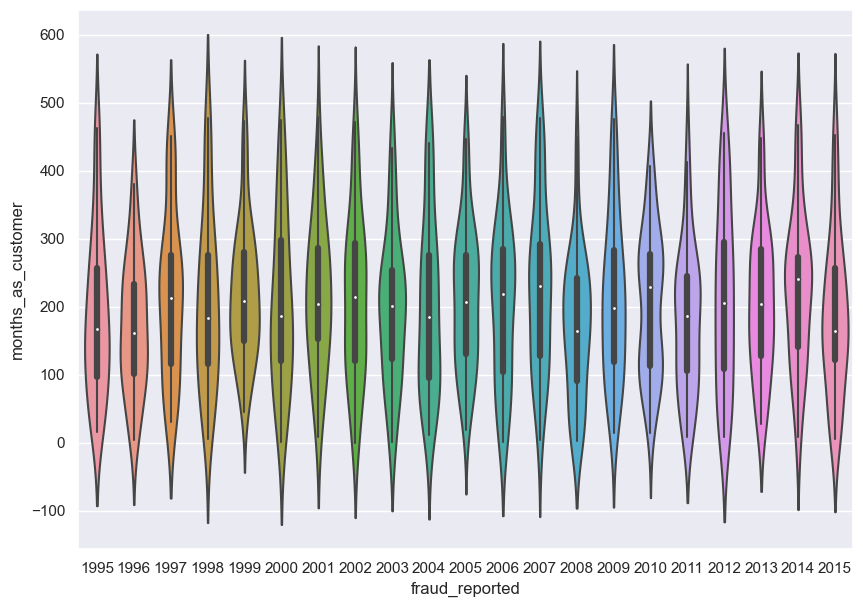

In [48]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.violinplot(y='months_as_customer',x='fraud_reported',data= df )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2006'),
  Text(1, 0, '2000'),
  Text(2, 0, '1990'),
  Text(3, 0, '2014'),
  Text(4, 0, '1997'),
  Text(5, 0, '2011'),
  Text(6, 0, '2002'),
  Text(7, 0, '1999'),
  Text(8, 0, '2012'),
  Text(9, 0, '1998'),
  Text(10, 0, '1992'),
  Text(11, 0, '2005'),
  Text(12, 0, '2004'),
  Text(13, 0, '1994'),
  Text(14, 0, '1991'),
  Text(15, 0, '1996'),
  Text(16, 0, '2013'),
  Text(17, 0, '2008'),
  Text(18, 0, '2003'),
  Text(19, 0, '2010'),
  Text(20, 0, '1993'),
  Text(21, 0, '1995'),
  Text(22, 0, '2007'),
  Text(23, 0, '2001'),
  Text(24, 0, '2009'),
  Text(25, 0, '2015')])

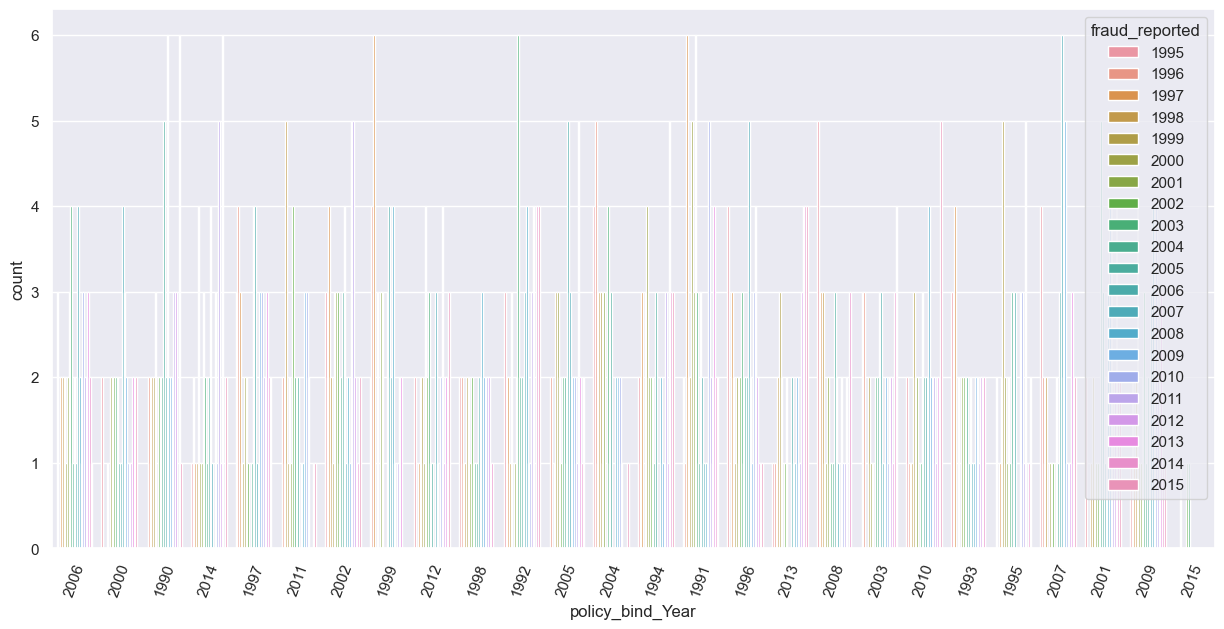

In [49]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_bind_Year',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'E400'),
  Text(1, 0, 'RAM'),
  Text(2, 0, 'Tahoe'),
  Text(3, 0, 'RSX'),
  Text(4, 0, '95'),
  Text(5, 0, 'Pathfinder'),
  Text(6, 0, 'A5'),
  Text(7, 0, 'Camry'),
  Text(8, 0, '92x'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

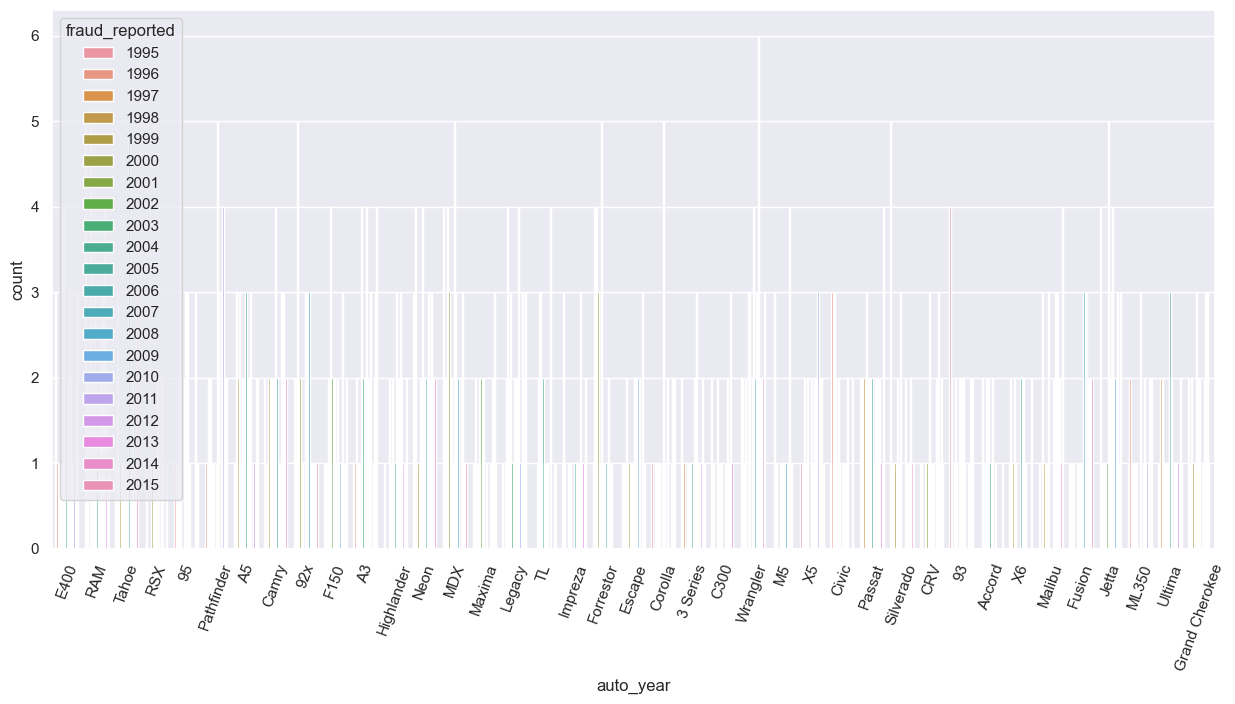

In [50]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_year',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Mercedes'),
  Text(1, 0, 'Dodge'),
  Text(2, 0, 'Chevrolet'),
  Text(3, 0, 'Accura'),
  Text(4, 0, 'Saab'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

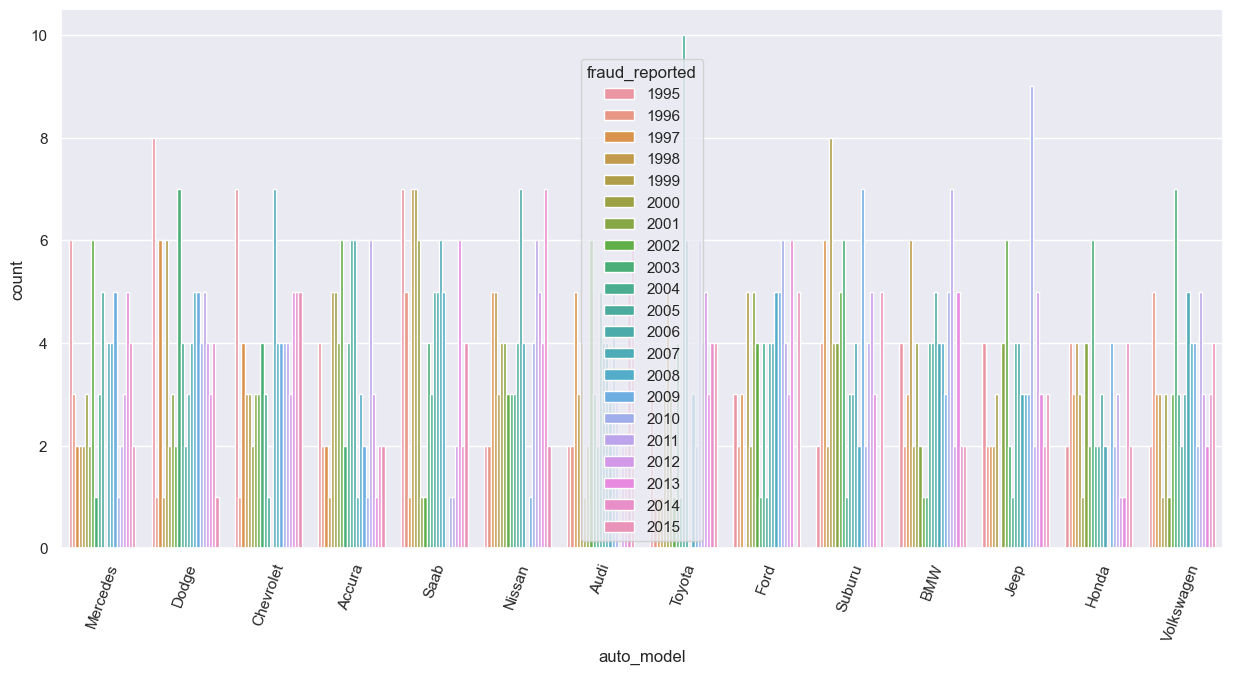

In [51]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_model',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

<Axes: xlabel='auto_make', ylabel='count'>

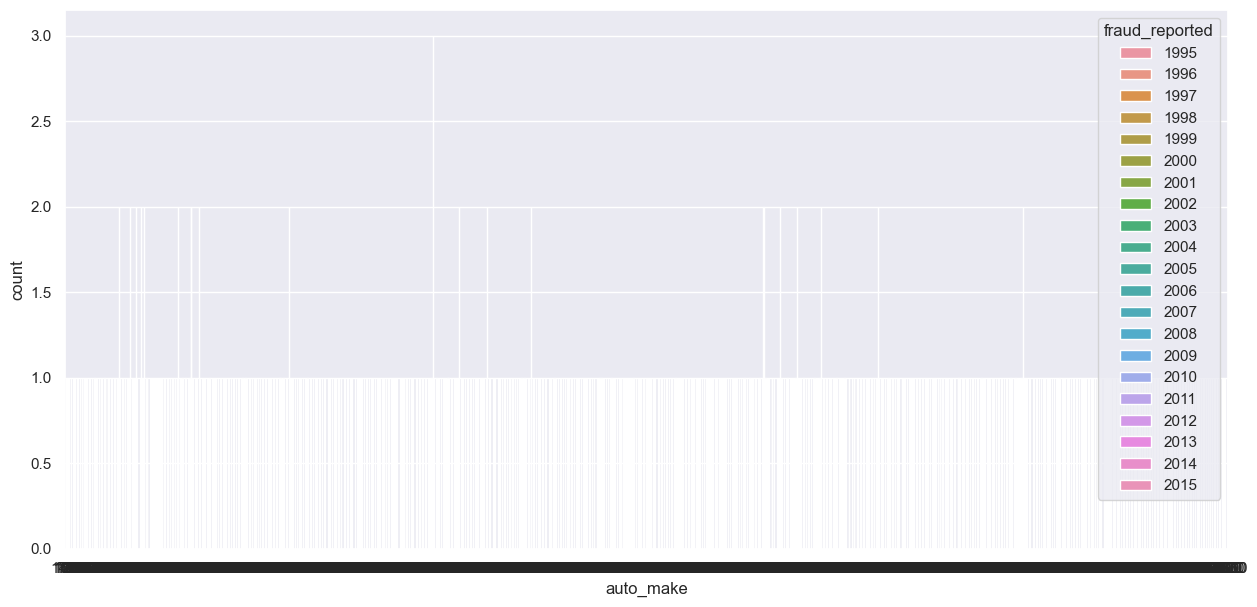

In [52]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)


# Done the analysis of all important features

# SKEWNESS

C:\Users\am253\AppData\Local\Temp\ipykernel_12664\3379329360.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]],color='b')
C:\Users\am253\AppData\Local\Temp\ipykernel_12664\3379329360.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]],color='b')
C:\Users\am253\AppData\Local\T

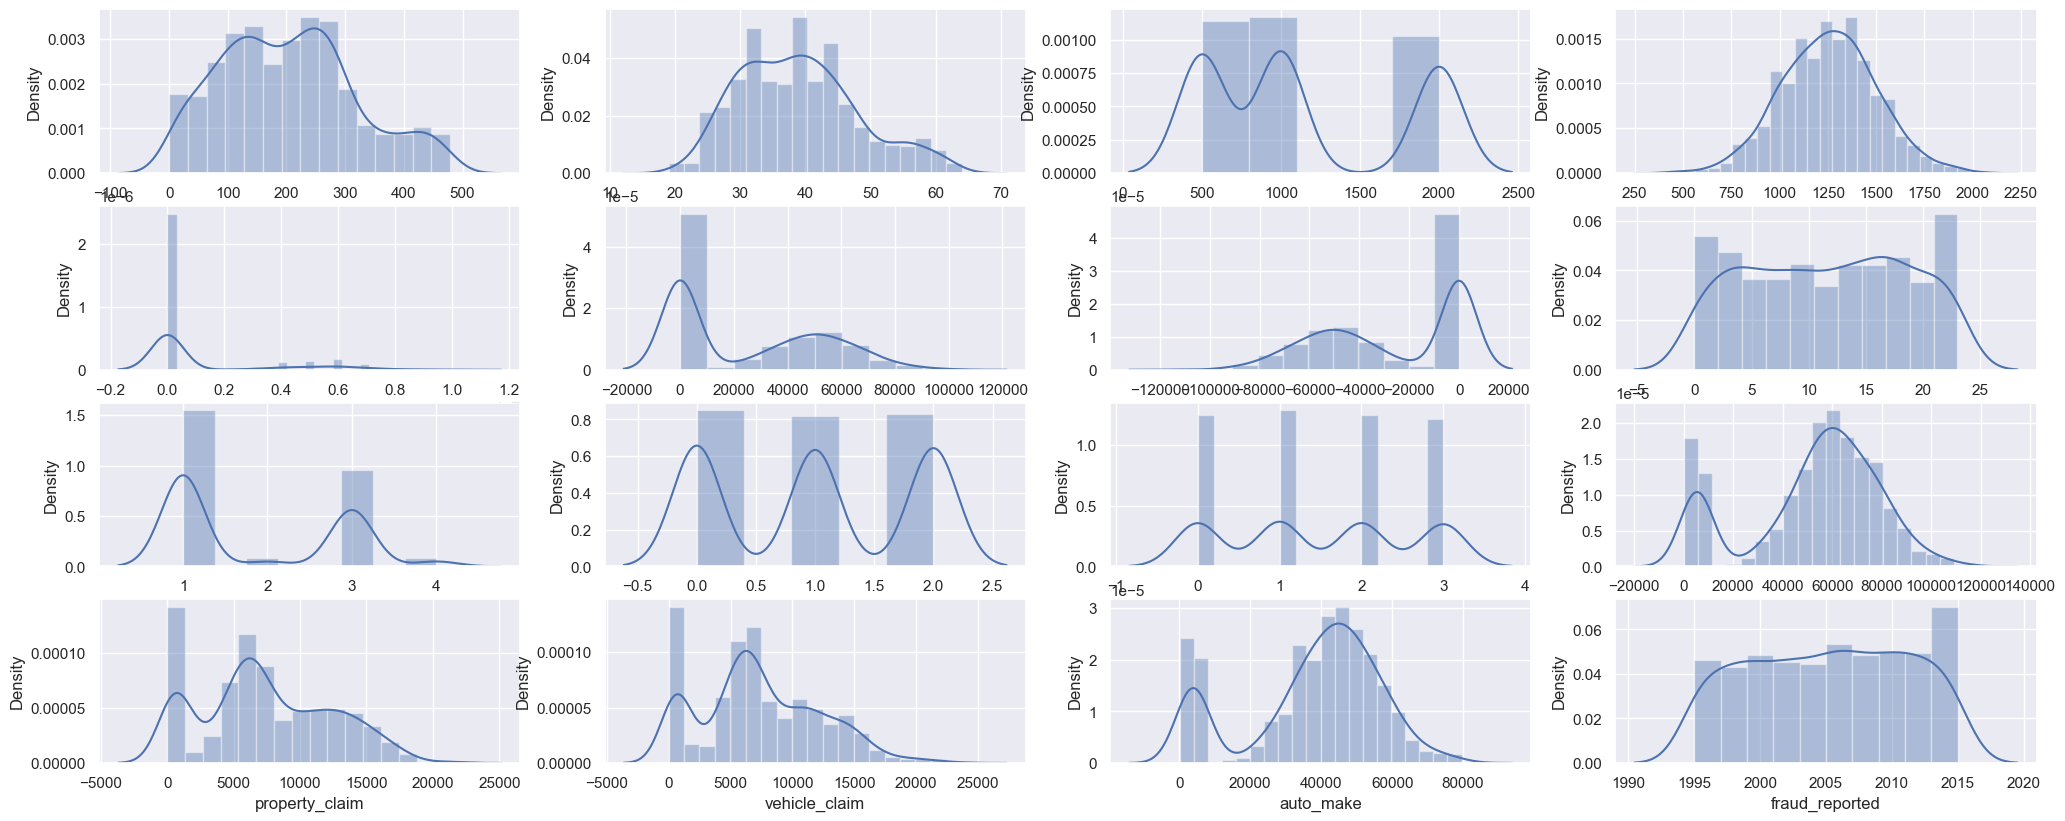

In [53]:
plt.figure(figsize=(25,20))
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [54]:
df.select_dtypes(include=['int64','float','int32']).skew()

months_as_customer             0.366457
age                            0.482272
policy_deductable              0.475562
policy_annual_premium          0.006996
umbrella_limit                 1.804490
capital-loss                   0.479721
incident_date                 -0.388152
number_of_vehicles_involved   -0.037021
property_damage                0.499351
witnesses                      0.012959
police_report_available        0.019685
injury_claim                  -0.594021
property_claim                 0.264702
vehicle_claim                  0.380626
auto_make                     -0.621008
fraud_reported                -0.050030
dtype: float64

# OUTLIER

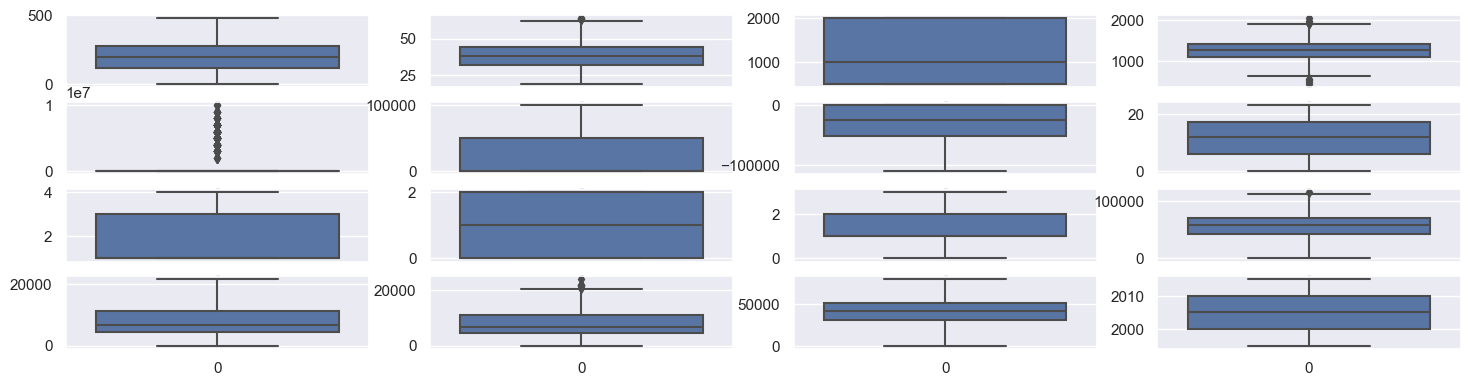

In [55]:
plt.figure(figsize=(18,10))
for o in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

# ZSCORE

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df.select_dtypes(include=['int64','float','int32'])))
print(np.where(z>3))

(array([ 30,  47,  87, 114, 118, 228, 247, 261, 312, 428, 456, 498, 501,
       655, 698, 761, 873, 920, 973], dtype=int64), array([ 4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4, 13,  4,  4,  4,  3,  4,
        4,  4], dtype=int64))


In [60]:
df_1=df[(z<3).all(axis=1)]
print("with outlier::",df.shape)
print("After removing Outlier::",df_1.shape)

with outlier:: (998, 37)
After removing Outlier:: (979, 37)


# LABELENCODING CATEGORICAL TO NUMERICAL

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           998 non-null    int64  
 1   age                          998 non-null    int64  
 2   policy_state                 998 non-null    object 
 3   policy_csl                   998 non-null    object 
 4   policy_deductable            998 non-null    int64  
 5   policy_annual_premium        998 non-null    float64
 6   umbrella_limit               998 non-null    int64  
 7   insured_education_level      998 non-null    object 
 8   insured_occupation           998 non-null    object 
 9   insured_hobbies              998 non-null    object 
 10  insured_relationship         998 non-null    object 
 11  capital-gains                998 non-null    object 
 12  capital-loss                 998 non-null    int64  
 13  incident_date            

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le=LabelEncoder()
categ_data=df.select_dtypes(exclude=['int64','float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           998 non-null    int64  
 1   age                          998 non-null    int64  
 2   policy_state                 998 non-null    int32  
 3   policy_csl                   998 non-null    int32  
 4   policy_deductable            998 non-null    int64  
 5   policy_annual_premium        998 non-null    float64
 6   umbrella_limit               998 non-null    int64  
 7   insured_education_level      998 non-null    int32  
 8   insured_occupation           998 non-null    int32  
 9   insured_hobbies              998 non-null    int32  
 10  insured_relationship         998 non-null    int32  
 11  capital-gains                998 non-null    int32  
 12  capital-loss                 998 non-null    int64  
 13  incident_date            

# DIVINDING DATA X & Y

In [65]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [66]:
x.shape

(998, 36)

In [67]:
y.shape

(998,)

# SCALING X VALUE

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [70]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
dtype: int64

In [71]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,...,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,0.425364,0.443019,0.506012,0.475952,0.424516,0.509734,0.110421,0.461924,0.494656,0.512178,...,0.484970,0.458122,0.346537,0.311964,0.475710,0.503546,0.508702,0.481931,0.505192,0.463928
std,0.240362,0.203210,0.415309,0.402379,0.408087,0.151371,0.229848,0.498798,0.324652,0.309255,...,0.405299,0.229826,0.227768,0.203482,0.237452,0.310452,0.292913,0.293641,0.318299,0.294173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240605,0.288889,0.000000,0.000000,0.000000,0.406027,0.000000,0.000000,0.166667,0.230769,...,0.000000,0.362633,0.199767,0.187368,0.379765,0.230769,0.263158,0.233333,0.181818,0.200000
50%,0.415449,0.422222,0.500000,0.500000,0.333333,0.510259,0.000000,0.000000,0.500000,0.538462,...,0.500000,0.503701,0.315851,0.284960,0.528494,0.538462,0.526316,0.500000,0.545455,0.480000
75%,0.576200,0.555556,1.000000,1.000000,1.000000,0.608573,0.000000,1.000000,0.833333,0.769231,...,1.000000,0.613199,0.527506,0.458809,0.637564,0.769231,0.763158,0.733333,0.818182,0.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


data have been scaled

# SPLITTING TRAIN & TEST DATA

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [74]:
x_train.shape

(728, 36)

In [75]:
x_test.shape

(270, 36)

In [76]:
y_train.shape

(728,)

In [77]:
y_test.shape

(270,)

# MODEL BUILDING

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# LOGISTIC REGRESSION

In [82]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score::",np.mean(logreg_score))

cross validation score:: 0.050070351758793964


In [87]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test,)
print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Testing accuracy::",logreg.score(x_test,y_test))


0.05185185185185185
[[0 1 1 1 2 0 1 0 2 2 0 1 1 0 1 0 1 0 1 1 0]
 [0 1 0 0 0 2 0 1 0 0 1 2 0 0 0 0 2 0 0 1 0]
 [4 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 2 0 0 0]
 [0 0 0 1 0 0 0 0 2 0 0 1 1 1 2 0 0 0 0 0 1]
 [2 1 1 2 1 2 0 1 1 0 3 2 2 1 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0]
 [1 0 0 0 0 0 1 1 0 2 1 0 0 0 1 3 0 0 0 1 3]
 [0 0 1 0 1 0 0 1 2 0 1 1 2 0 0 0 0 0 0 1 1]
 [2 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 2]
 [0 0 0 1 0 0 0 2 2 1 1 1 0 0 1 1 1 1 0 0 1]
 [1 2 0 0 1 2 0 0 2 0 2 1 1 0 0 1 0 0 1 1 0]
 [2 2 1 1 1 1 0 2 0 0 0 0 2 1 1 0 0 0 1 0 1]
 [1 2 1 0 1 0 0 0 3 0 1 1 1 1 0 0 2 0 0 0 0]
 [1 1 1 1 0 2 0 1 0 0 0 2 0 1 1 1 1 0 1 0 0]
 [2 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 2]
 [0 0 0 0 0 1 1 0 1 0 0 5 1 1 0 0 2 1 0 0 1]
 [2 2 0 0 0 1 2 0 0 0 1 1 0 0 1 1 1 0 0 0 1]
 [1 0 2 1 0 0 3 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
 [1 0 0 2 2 0 0 2 1 0 2 1 0 1 1 1 2 0 0 0 3]
 [1 1 1 0 0 0 0 1 2 0 0 1 0 0 0 1 0 1 0 1 0]
 [1 1 0 1 2 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0]]
              precision    recall 

# DECISION TREE CLASSIFIER

In [89]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm::",np.mean(dtc_score))

cross validation score for svm:: 0.04910050251256282


In [90]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test,)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Testing accuracy::",dtc.score(x_test,y_test))

0.040740740740740744
[[1 0 0 0 3 3 0 2 0 1 0 0 1 1 0 1 1 0 0 2 0]
 [1 1 1 0 0 2 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1]
 [3 0 0 0 1 1 0 1 2 0 0 0 0 1 1 0 0 1 1 0 0]
 [1 0 0 2 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0]
 [3 2 0 0 0 1 0 2 1 1 1 2 0 1 1 0 2 1 0 2 0]
 [0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0]
 [0 1 0 0 0 0 0 2 1 2 1 0 0 0 0 2 1 0 1 2 1]
 [0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 0 0 0 1 0 0]
 [1 1 0 1 0 1 0 0 0 0 1 0 2 0 1 0 0 0 1 0 1]
 [0 1 0 1 1 1 0 1 0 0 2 1 0 0 1 0 1 1 0 1 1]
 [1 1 1 1 1 0 0 0 0 0 1 3 1 0 1 1 0 0 1 1 1]
 [1 1 0 2 0 0 1 1 0 2 2 0 0 2 1 0 0 2 0 0 1]
 [0 2 1 0 1 0 0 0 3 1 0 1 0 0 0 1 1 0 2 1 0]
 [2 0 0 0 1 1 0 2 1 1 0 1 2 0 0 1 1 0 1 0 0]
 [0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 2 1 1 0 1 0]
 [0 0 0 1 1 1 0 0 1 0 1 2 1 0 1 0 0 0 1 3 1]
 [1 1 2 0 0 0 0 0 4 1 0 0 0 0 1 1 1 0 0 1 0]
 [2 1 0 1 0 0 0 0 1 1 0 0 0 0 5 0 0 1 1 0 0]
 [2 1 0 2 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 2 2]
 [0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 2 0 0 0]
 [1 0 0 1 0 1 0 0 0 1 0 0 2 0 0 0 0 0 0 2 0]]
              precision    recall

# KNEIGHBORS CLASSIFIER

In [91]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn::",np.mean(knn_score))

cross validation score for knn:: 0.04212060301507538


In [92]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test,)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Testing accuracy::",knn.score(x_test,y_test))

0.040740740740740744
[[4 0 1 2 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0]
 [0 0 3 0 1 1 0 0 1 1 0 0 0 0 0 0 2 0 1 0 0]
 [1 2 0 2 0 1 0 0 1 2 2 0 0 0 0 1 0 0 0 0 0]
 [2 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [3 3 4 2 0 1 1 1 1 0 0 0 2 0 0 0 1 1 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0 0 0]
 [2 1 2 1 2 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1]
 [3 0 2 1 2 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 0 4 0 2 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 1 2 2 1 1 0 0 2 0 0 0 0 0 0 2 0 0 0]
 [2 1 3 0 0 1 1 0 1 0 2 1 0 0 1 1 0 0 0 1 0]
 [2 1 2 3 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1]
 [5 1 1 0 1 0 0 1 1 0 2 0 1 1 0 0 0 0 0 0 0]
 [3 1 1 1 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [3 1 3 0 0 2 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [3 2 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 3]
 [5 2 0 0 1 1 1 0 0 1 0 0 0 0 0 0 2 0 0 0 0]
 [4 0 1 1 2 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0]
 [4 0 2 3 2 2 2 0 1 0 0 0 0 0 1 0 1 0 0 0 1]
 [3 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [2 0 2 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0]]
              precision    recall

# RANDOM FOREST CLASSIFIER

In [93]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc::",np.mean(rfc_score))

cross validation score for rfc:: 0.038055276381909545


In [94]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test,)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Testing accuracy::",rfc.score(x_test,y_test))

0.037037037037037035
[[1 0 0 0 1 1 0 2 4 0 1 0 1 0 0 0 1 1 1 0 2]
 [1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 2]
 [0 1 1 1 0 1 0 3 0 0 0 0 0 0 1 0 2 1 0 0 1]
 [2 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
 [2 0 1 0 1 4 0 1 1 0 1 0 2 1 1 1 3 0 0 1 0]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [2 0 1 0 1 2 0 2 1 0 1 1 0 1 1 0 0 0 0 0 1]
 [1 0 0 0 2 0 0 2 2 0 1 0 0 0 2 0 0 0 0 0 1]
 [1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1]
 [1 0 1 0 0 0 1 0 1 0 0 0 1 2 1 0 2 1 0 0 2]
 [2 2 0 0 1 1 1 0 2 0 0 2 0 2 1 0 0 1 0 0 0]
 [2 0 0 2 0 1 0 2 1 0 1 0 3 0 0 2 1 0 0 0 1]
 [2 0 0 0 0 1 0 1 0 0 1 1 1 0 2 1 1 1 0 1 1]
 [1 0 1 1 1 0 0 0 3 0 1 1 1 1 0 0 2 0 1 0 0]
 [2 0 0 0 0 2 0 0 1 0 1 0 1 0 0 1 2 2 0 0 1]
 [0 0 1 0 1 4 0 0 2 0 0 2 1 0 1 0 0 1 0 0 1]
 [1 0 1 2 1 1 0 0 2 0 0 2 0 0 0 0 0 0 0 1 2]
 [1 0 1 2 1 1 0 0 1 0 0 2 0 1 0 0 1 0 1 1 0]
 [1 0 1 1 0 1 1 2 2 0 0 1 2 0 1 0 2 0 0 1 3]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 2 0 1 2]
 [1 0 0 3 1 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0]]
              precision    recall

# ADA BOOST CLASSIFIER

In [96]:
abc=AdaBoostClassifier()
abc_score=cross_val_score(abc,x,y,cv=5,scoring='accuracy')
print("cross validation score for abc::",np.mean(abc_score))

cross validation score for abc:: 0.04104020100502513


In [98]:
abc.fit(x_train,y_train)
predicted_abc=abc.predict(x_test,)
print(accuracy_score(y_test,predicted_abc))
print(confusion_matrix(y_test,predicted_abc))
print(classification_report(y_test,predicted_abc))
print("Training accuracy::",abc.score(x_train,y_train))
print("Testing accuracy::",abc.score(x_test,y_test))

0.044444444444444446
[[1 1 1 3 3 0 1 0 1 0 0 0 0 1 1 2 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 2 2 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 2 1 2 0 0 0 2 1 2 0]
 [0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 3]
 [0 1 0 0 2 0 1 0 0 0 0 4 2 0 1 3 1 2 1 0 2]
 [0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 2 1 0 0 0]
 [0 0 1 2 1 1 0 1 0 1 1 2 0 1 0 1 1 0 0 0 1]
 [1 1 0 0 0 0 0 0 1 0 1 2 0 1 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 2 1 0 2]
 [2 0 1 1 2 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 2]
 [0 0 1 1 0 1 1 0 2 1 1 1 1 0 0 2 0 1 1 0 1]
 [0 2 0 0 2 0 0 0 3 0 0 1 1 1 1 2 2 0 1 0 0]
 [0 1 2 0 0 0 0 0 1 0 0 4 0 0 1 2 1 0 0 1 1]
 [3 0 1 0 1 0 0 0 0 0 0 0 4 2 1 1 0 0 1 0 0]
 [1 1 0 0 2 0 1 0 1 0 0 1 2 0 0 0 1 2 0 0 1]
 [1 0 0 0 0 1 0 0 2 0 1 3 1 0 0 0 1 1 1 0 2]
 [2 0 0 1 0 0 0 1 1 0 2 0 1 0 1 0 1 0 2 0 1]
 [1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 4 0 0 0 0]
 [2 1 0 0 1 1 0 3 2 0 1 2 1 1 1 1 1 0 1 0 0]
 [0 1 0 0 0 0 0 1 1 0 0 1 2 0 0 0 0 1 0 1 2]
 [1 0 0 0 0 0 0 0 3 1 0 0 0 0 1 0 1 0 1 0 0]]
              precision    recall

# BAGGING CLASSIFIER

In [99]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=5,scoring='accuracy')
print("cross validation score for bgc::",np.mean(bgc_score))

cross validation score for bgc:: 0.04911557788944724


In [100]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test,)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Testing accuracy::",bgc.score(x_test,y_test))

0.06666666666666667
[[1 1 1 2 2 2 2 0 0 0 1 1 0 2 0 0 0 0 0 0 1]
 [1 0 0 1 2 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0]
 [2 0 2 0 0 1 0 1 1 1 0 1 0 0 0 2 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0]
 [2 0 2 2 0 1 1 3 0 0 1 1 0 1 1 1 1 1 1 0 1]
 [1 0 2 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [2 0 6 0 0 0 1 0 1 0 1 0 0 0 0 2 0 0 1 0 0]
 [0 0 0 1 0 1 1 2 2 0 1 1 0 0 1 0 0 0 0 0 1]
 [2 0 0 1 0 1 0 0 2 1 0 1 0 0 0 2 0 0 0 0 0]
 [1 0 0 0 3 1 0 2 1 0 1 1 0 0 1 0 0 0 1 0 1]
 [0 0 1 0 1 2 0 2 2 2 0 0 2 1 1 0 0 0 0 0 1]
 [2 2 1 2 0 0 0 2 1 0 0 1 1 0 1 1 0 1 0 1 0]
 [2 0 1 1 2 1 1 2 1 1 0 0 1 0 0 0 0 0 0 0 1]
 [0 1 1 0 1 0 3 0 1 0 2 0 0 1 1 0 1 1 0 1 0]
 [0 0 1 0 0 0 1 0 1 1 2 0 2 2 1 1 0 1 0 0 0]
 [0 2 0 0 0 1 3 0 1 0 1 1 2 0 0 2 0 1 0 0 0]
 [2 1 0 2 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0]
 [2 0 1 0 1 0 1 0 0 0 0 3 2 0 0 1 0 1 1 0 0]
 [2 3 2 3 0 0 1 1 1 0 1 0 1 0 1 0 0 0 2 0 1]
 [0 1 0 0 0 1 0 0 0 1 0 0 2 0 0 0 2 0 1 1 1]
 [2 0 0 0 1 0 0 0 0 0 1 0 2 1 0 0 0 0 0 1 0]]
              precision    recall 

# GRADIENT BOOSTING CLASSIFIER

In [101]:
grbc=BaggingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=5,scoring='accuracy')
print("cross validation score for grbc::",np.mean(grbc_score))

cross validation score for grbc:: 0.051110552763819095


In [103]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test,)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Testing accuracy::",grbc.score(x_test,y_test))

0.03333333333333333
[[3 0 0 1 1 1 0 1 2 0 0 1 0 1 1 0 0 1 2 0 1]
 [2 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1]
 [2 0 0 1 2 1 0 0 0 0 0 1 1 0 0 0 0 1 2 0 1]
 [2 0 1 0 1 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1]
 [4 1 0 3 1 1 0 0 1 2 3 0 0 0 2 2 0 0 0 0 0]
 [0 1 0 3 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [1 0 2 1 1 0 1 0 0 0 2 1 1 1 2 0 0 1 0 0 0]
 [3 0 0 1 1 1 0 0 2 0 0 1 1 0 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 1 0 0 0 0 1 2 1 0 1 0 0 0 2]
 [2 0 0 0 0 2 0 2 1 0 1 1 1 0 0 2 0 1 0 0 0]
 [1 1 1 1 1 4 0 1 0 0 0 1 1 2 0 0 0 0 0 0 1]
 [2 1 1 0 0 1 0 3 0 0 0 0 2 0 1 3 0 0 1 1 0]
 [2 0 1 0 1 1 0 1 0 0 0 0 2 2 0 0 0 0 2 0 2]
 [3 1 1 0 1 1 2 0 0 1 0 1 0 1 2 0 0 0 0 0 0]
 [1 0 0 2 0 2 0 0 0 1 1 1 0 0 0 0 0 1 1 1 2]
 [0 1 0 1 2 3 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1]
 [2 1 2 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
 [3 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0]
 [0 1 2 1 1 0 1 2 3 0 0 0 2 0 0 1 1 3 1 0 0]
 [0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]
 [3 0 0 2 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall 

# HYPER TUNNING

GRADIENT BOOSTING CLASSIFIER

In [133]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [134]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)


In [135]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.040740740740740744


In [136]:
rfc_grid.best_params_


{'criterion': 'entropy',
 'min_samples_split': 3,
 'n_estimators': 200,
 'random_state': 10}

In [137]:
best_param={
    'criterion' : ['entropy'],
    'n_estimators':[1000],
    'min_samples_split':[4],
     'random_state':[10]    }

In [138]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)


In [149]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.040740740740740744


# SAVING MODEL

In [150]:
import joblib

In [151]:
joblib.dump(best_rfc_grid.best_estimator_,'INSURANCE_CLAIM_FRAUD_DETECTION')

['INSURANCE_CLAIM_FRAUD_DETECTION']